In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
#path = '/content/drive/My Drive/Assignment-files/flower.jpg'
import cv2
path=cv2.imread('lamp.jpg') 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import rgb_to_hsv
from scipy.stats import skew

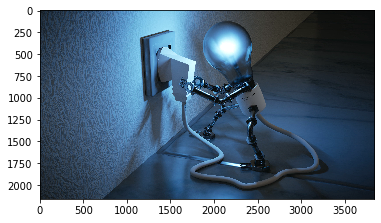

In [5]:
pic = path
plt.imshow(pic)
plt.show()

In [6]:
pic.shape

(2160, 3840, 3)

In [7]:
def mean(a):
    arr= a.reshape(-1)
    res=0
    for i in arr:
        res+=i
    res/=len(arr)
    return res

In [8]:
def std(a):
    arr= a.reshape(-1)
    mean=0
    for i in arr:
        mean+=i
    mean/=len(arr)
    res=0
    for i in arr:
        res+=(i-mean)**2
    res/=len(arr)
    res=res**(1/2)
    return res

In [9]:
def skew(a):
    arr= a.reshape(-1)
    mean=0
    for i in arr:
        mean+=i
    mean/=len(arr)
    res=0
    for i in arr:
        res+=(i-mean)**3
    res/=len(arr)
    res=res**(1/3)
    return res

In [10]:
def img_partition(img, gpc):    #function block = img_partition(img, gpc)
    [h_img, w_img] = [img.shape[0], img.shape[1]]
    sz= (img.shape[1])/(gpc[0] * gpc[1])
    block = []
    x=0
    y=0
    for i in range(int(sz)):
        for d in range(img.shape[2]):
            temp_block=[]
            for c in range(x,x+gpc[1]):
                temp_col=[]
                for r in range(y,y+gpc[1]):
                    temp_col.append(img[r][c][d])
                temp_block.append(temp_col)
            block.append(temp_block)
        x=x+gpc[0]
        y=y+gpc[1]
    block= np.array(block)
    return block

In [11]:
def extractCM(img, gpc):
# Extract Color Moments (CM) features from image
# Inputs:
#     img - image in HSV format
#     gpc - grid partition constant for CM features extraction
#
# Outputs:
#     CM  - CM features
    CM = []
    block = img_partition(img, gpc)
    for i in range(len(block)):

        # matrix to vector for each channel
        currentBlock = np.array(block[i])
        #currentBlock = cur_block.reshape(cur_block.shape[0]*cur_block.shape[1], 3)
        CM_block = []
        # 3 mean values
        curMean = mean(currentBlock)
        CM_block.append(curMean)

        # 3 variance values
        curVar = std(currentBlock)
        CM_block.append(curVar)

        # 3 skewness values
        curSkew = skew(currentBlock)
        CM_block.append(curSkew)
        CM.append(CM_block)
    return CM

In [12]:
img_hsv = rgb_to_hsv(pic)
block_size= np.array([4,4]) # 4X4 from 480X480
CM = extractCM(img_hsv, block_size)

C:\Users\Asus\anaconda33\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [13]:
print(CM)

[[0.5817708522081375, 0.006916164202294119, 0.00725585204572433], [0.37835289165377617, 0.03668118302512314, nan], [40.8125, 5.317644567851446, 5.395836956645334], [0.5791666805744171, 0.0024056066210607404, 0.002523758142821676], [0.4030753057450056, 0.028380856061156923, 0.019736055810404704], [39.1875, 3.282886496667224, nan], [0.5791666805744171, 0.0024056066210607404, 0.002523758142821676], [0.42184580862522125, 0.016834262956366697, 0.008071119171571413], [37.3125, 2.2560682059725057, 1.9583254740391793], [0.5818576440215111, 0.005178577803129121, 0.0056198440685269755], [0.4142448268830776, 0.041928917764835656, 0.0376863886725794], [39.375, 2.8034576865007255, 2.9036208735322644], [0.5787829011678696, 0.004830041205695164, nan], [0.39983232133090496, 0.034166040292470945, 0.023667299155148036], [43.625, 6.343057228182637, 5.897005147208904], [0.5782342553138733, 0.002982146872379111, 0.003044495194657648], [0.45599672198295593, 0.049362631665994604, 0.0348417447532461], [51.625